# House prices

### - Goal
#### 각 집의 판매 가격 예측
#### test set의 각 ID 에 대해 SalePrice 변수의 값 예측

### - Submit
#### 예측 값의 로그와 관찰된 판매 가격의 로그사이의 RMSE

### - 설명
<!-- 파일 설명
train.csv- 훈련 세트
test.csv- 테스트 세트
data_description.txt- 원래 Dean De Cock이 준비했지만 여기에 사용 된 열 이름과 일치하도록 가볍게 편집 한 각 열에 대한 전체 설명
sample_submission.csv- 판매 연도 및 월, 부지 면적 및 침실 수에 대한 선형 회귀의 벤치 마크 제출
데이터 필드
다음은 데이터 설명 파일에서 찾을 수있는 간단한 버전입니다.

SalePrice- 부동산의 판매 가격 (달러)입니다. 이것이 예측하려는 목표 변수입니다.
MSSubClass : 건물 등급
MSZoning : 일반 구역 분류
LotFrontage : 부동산에 연결된 거리의 선형 피트
LotArea : 평방 피트 단위의 부지 크기
거리 : 도로 접근 유형
골목길 : 골목 접근 유형
LotShape : 속성의 일반적인 모양
LandContour : 부동산의 평탄도
유틸리티 : 사용 가능한 유틸리티 유형
LotConfig : 로트 구성
LandSlope : 부동산의 경사
지역 : 에임스시 경계 내의 물리적 위치
조건 1 : 주요 도로 또는 철도와의 근접성
조건 2 : 주요 도로 또는 철도와의 근접성 (초가있는 경우)
BldgType : 주거 형태
HouseStyle : 주거 스타일
OverallQual : 전체 재료 및 마감 품질
OverallCond : 전체 상태 등급
준공 연도 : 최초 공사 일
YearRemodAdd : 리모델링 날짜
RoofStyle : 지붕 유형
RoofMatl : 지붕 재료
Exterior1st : 집 외부 커버
외장 2 차 : 주택 외장재 (하나 이상인 경우)
MasVnrType : 조적 베니어 유형
MasVnrArea : 벽돌 베니어 면적 (평방 피트)
ExterQual : 외장재 품질
ExterCond : 외장재의 현황
기초 : 기초 유형
BsmtQual : 지하 높이
BsmtCond : 지하실 개황
BsmtExposure : 워크 아웃 또는 정원 수준의 지하 벽
BsmtFinType1 : 지하 마감면의 품질
BsmtFinSF1 : 유형 1 완성 된 평방 피트
BsmtFinType2 : 두 번째 완성 된 영역의 품질 (있는 경우)
BsmtFinSF2 : 유형 2 완성 된 평방 피트
BsmtUnfSF : 미완성 된 지하실 면적
TotalBsmtSF : 지하 총 평방 피트
난방 : 난방의 종류
HeatingQC : 난방 품질 및 상태
CentralAir : 중앙 에어컨
전기 : 전기 시스템
1stFlrSF : 1 층 평방 피트
2ndFlrSF : 2 층 평방 피트
LowQualFinSF : 저품질 마감 평방 피트 (모든 층)
GrLivArea : 지상 (지상) 거실 면적 평방 피트
BsmtFullBath : 지하 전체 욕실
BsmtHalfBath : 지하 반 욕실
FullBath : 등급 이상의 전체 욕실
HalfBath : 지상 절반의 목욕
침실 : 지하층 이상의 침실 수
주방 : 주방 수
KitchenQual : 주방 품질
TotRmsAbvGrd : 학년 이상의 총 방 (화장실 제외)
기능 : 홈 기능 등급
벽난로 : 벽난로 수
FireplaceQu : 벽난로 품질
GarageType : 차고 위치
GarageYrBlt : 차고 건설 연도
GarageFinish : 차고 내부 마감
GarageCars : 차량 수용 가능 차고 크기
GarageArea : 차고의 크기 (평방 피트)
GarageQual : 차고 품질
GarageCond : 차고 상태
PavedDrive : 포장 된 진입로
WoodDeckSF : 목재 데크 면적 (평방 피트)
OpenPorchSF : 평방 피트 단위의 오픈 현관 영역
EnclosedPorch : 닫힌 현관 영역 (평방 피트)
3SsnPorch : 평방 피트의 3 계절 현관 면적
ScreenPorch : 스크린 현관 면적 (평방 피트)
PoolArea : 수영장 면적 (평방 피트)
PoolQC : 수영장 품질
울타리 : 울타리 품질
MiscFeature : 다른 카테고리에서 다루지 않는 기타 기능
MiscVal : 기타 기능의 $ Value
MoSold : 월 판매
YrSold : 판매 연도
SaleType : 판매 유형
SaleCondition : 판매 조 -->

In [1]:
!pip install watermark

In [2]:
%load_ext watermark

In [3]:
%watermark

Last updated: 2021-05-20T23:19:35.758914+09:00

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.21.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 11, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [4]:
import pandas as pd
import os
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np


from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus = False)

# 1. 파일 불러오기

In [5]:
df_test = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv", engine='python',encoding='CP949')
df_train = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv", engine='python',encoding='CP949')

In [6]:
df_test.shape

(1459, 80)

In [7]:
df_train.shape

(1460, 81)

In [8]:
Y_train = df_train['SalePrice']
# del df_train['SalePrice']

In [9]:
Y_train = Y_train.drop(Y_train.index[1459])

In [10]:
display(df_train.info())
display(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. 데이터 전처리

In [11]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
df_train_filter = df_train.copy()

In [13]:
df_train_filter

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
df_train_filter.drop(['Alley' , 'LotFrontage','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
df_train_filter

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [15]:
df_train_filter.columns
df_train_filter_columns_name = ['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [16]:
df_train_filter = pd.DataFrame(df_train_filter, columns = df_train_filter_columns_name)
df_train_filter

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [17]:
df_train_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### object 은 최빈값으로, float or int 는 평균값으로 결측값 처리

In [18]:
most_1 = df_train_filter['MasVnrType'].value_counts(dropna=True).idxmax()
df_train_filter['MasVnrType'].fillna(most_1, inplace=True)
most_2 = df_train_filter['BsmtQual'].value_counts(dropna=True).idxmax()
df_train_filter['BsmtQual'].fillna(most_2, inplace=True)
most_3 = df_train_filter['BsmtCond'].value_counts(dropna=True).idxmax()
df_train_filter['BsmtCond'].fillna(most_3, inplace=True)
most_4 = df_train_filter['BsmtExposure'].value_counts(dropna=True).idxmax()
df_train_filter['BsmtExposure'].fillna(most_4, inplace=True)
most_5 = df_train_filter['BsmtFinType1'].value_counts(dropna=True).idxmax()
df_train_filter['BsmtFinType1'].fillna(most_5, inplace=True)
most_6 = df_train_filter['BsmtFinType2'].value_counts(dropna=True).idxmax()
df_train_filter['BsmtFinType2'].fillna(most_6, inplace=True)
most_7 = df_train_filter['Electrical'].value_counts(dropna=True).idxmax()
df_train_filter['Electrical'].fillna(most_7, inplace=True)
most_8 = df_train_filter['GarageType'].value_counts(dropna=True).idxmax()
df_train_filter['GarageType'].fillna(most_8, inplace=True)
most_9 = df_train_filter['GarageFinish'].value_counts(dropna=True).idxmax()
df_train_filter['GarageFinish'].fillna(most_9, inplace=True)
most_10 = df_train_filter['GarageQual'].value_counts(dropna=True).idxmax()
df_train_filter['GarageQual'].fillna(most_10, inplace=True)
most_11 = df_train_filter['GarageCond'].value_counts(dropna=True).idxmax()
df_train_filter['GarageCond'].fillna(most_11, inplace=True)

In [19]:
df_train_filter['MasVnrArea'].fillna(df_train_filter['MasVnrArea'].mean(), inplace=True)
df_train_filter['GarageYrBlt'].fillna(df_train_filter['GarageYrBlt'].mean(), inplace=True)

In [20]:
df_train_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

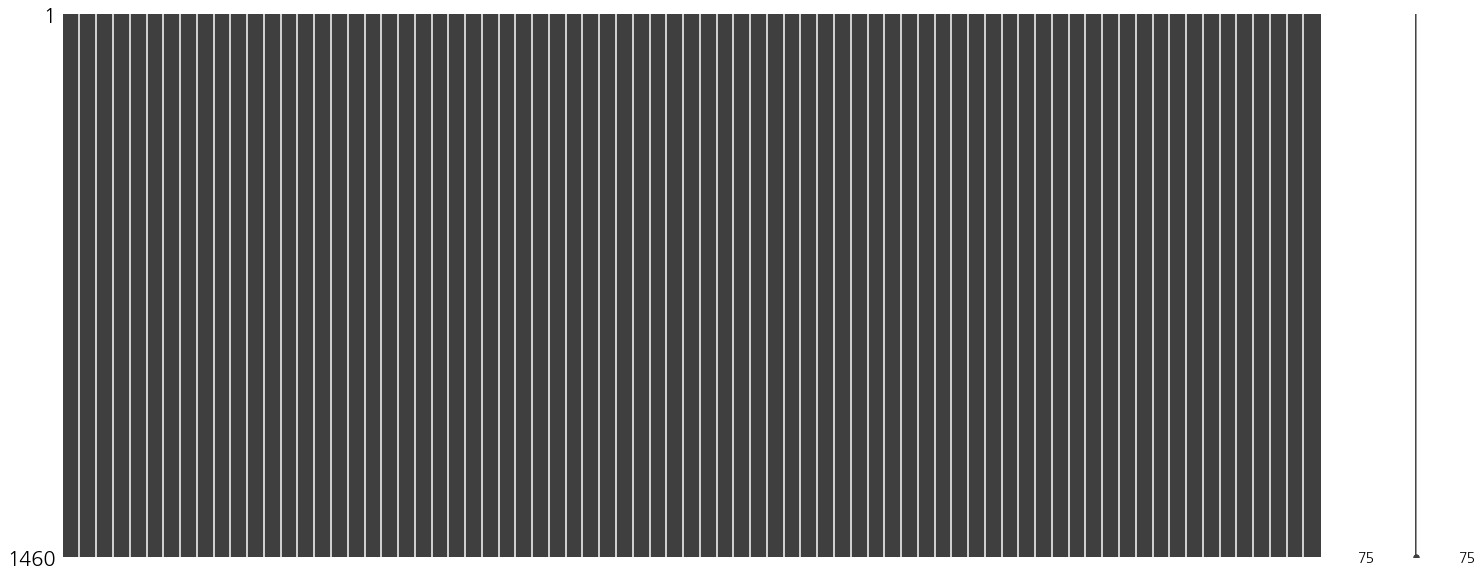

In [21]:
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

msno.matrix(df_train_filter)
plt.show()

#  3. 텍스트와 범주형 특성 다루기
## 1) One- Hot encoding
#### - dummies를 통해 인코딩

In [22]:
df_train_filter_dummies = pd.get_dummies(df_train_filter, columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2' ,'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','SaleType','SaleCondition'
])

In [23]:
df_train_filter_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 271 entries, Id to SaleCondition_Partial
dtypes: float64(2), int64(35), uint8(234)
memory usage: 755.8 KB


# 4. 스케일링
### - Min-Max 스케일링은 특징의 최소값과 최대값을 먼저 계산하고 전체 특징값들을 0~1 사이의 값으로 변경
### - 표준화는 먼저 평균과 표준편차를 구하고 전체 데이터 각각에 대해 평균을 뺀 후
### 표준편차로 나눠 분산이 1이 되도록 데이터를 조정

##### 1) Min-Max

In [24]:
df_train_filter_scale_m = df_train_filter_dummies.copy()

In [25]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [26]:
df_train_filter_scale_m = minmax_scaler.fit_transform(df_train_filter_scale_m)
df_train_filter_scale_m = pd.DataFrame(df_train_filter_scale_m)
df_train_filter_scale_m.columns = df_train_filter_dummies.columns 

In [27]:
df_train_filter_scale_m

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000685,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.001371,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002056,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.002742,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.997944,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.998629,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.999315,0.000000,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##### 2) 표준화

In [28]:
df_train_filter_scale_std = df_train_filter_dummies.copy()

In [29]:
df_train_filter_scale_std = (df_train_filter_scale_std- df_train_filter_scale_std.mean())/df_train_filter_scale_std.std()

In [30]:
df_train_filter_scale_std

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730272,0.073350,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.511243,0.575228,-0.288554,...,-0.058601,-0.301858,-0.045361,0.390159,-0.272522,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
1,-1.727900,-0.872264,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.574214,1.171591,-0.288554,...,-0.058601,-0.301858,-0.045361,0.390159,-0.272522,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
2,-1.725528,0.073350,0.073455,0.651256,-0.517023,0.984415,0.829930,0.322950,0.092875,-0.288554,...,-0.058601,-0.301858,-0.045361,0.390159,-0.272522,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
3,-1.723156,0.309753,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.574214,-0.499103,-0.288554,...,-0.058601,-0.301858,-0.045361,0.390159,3.666910,-0.052396,-0.091003,-0.117811,-2.137613,-0.30589
4,-1.720785,0.073350,0.375020,1.374324,-0.517023,0.951306,0.733056,1.364102,0.463410,-0.288554,...,-0.058601,-0.301858,-0.045361,0.390159,-0.272522,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.720785,0.073350,-0.260471,-0.071812,-0.517023,0.918196,0.733056,-0.574214,-0.972685,-0.288554,...,-0.058601,-0.301858,-0.045361,0.390159,-0.272522,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
1456,1.723156,-0.872264,0.266316,-0.071812,0.381612,0.222899,0.151813,0.084814,0.759399,0.721865,...,-0.058601,-0.301858,-0.045361,0.390159,-0.272522,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
1457,1.725528,0.309753,-0.147760,0.651256,3.077516,-1.002149,1.023678,-0.574214,-0.369744,-0.288554,...,-0.058601,-0.301858,-0.045361,0.390159,-0.272522,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
1458,1.727900,-0.872264,-0.080133,-0.794879,0.381612,-0.704164,0.539309,-0.574214,-0.865252,6.090101,...,-0.058601,-0.301858,-0.045361,0.390159,-0.272522,-0.052396,-0.091003,-0.117811,0.467491,-0.30589


# 6. Test dataset 가공 및 테스트
#### - 위 train과 가공 방법 같음

In [31]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [32]:
df_test_filter = df_test.copy()

In [33]:
display(df_test_filter.info())
display(df_test_filter.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [34]:
df_test_filter.drop(['Alley' , 'LotFrontage','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
df_test_filter

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [35]:
most_1_y = df_test_filter['MasVnrType'].value_counts(dropna=True).idxmax()
df_test_filter['MasVnrType'].fillna(most_1_y, inplace=True)    
most_2_y = df_test_filter['BsmtQual'].value_counts(dropna=True).idxmax()
df_test_filter['BsmtQual'].fillna(most_2_y, inplace=True)
most_3_y = df_test_filter['BsmtCond'].value_counts(dropna=True).idxmax()
df_test_filter['BsmtCond'].fillna(most_3_y, inplace=True)
most_4_y = df_test_filter['BsmtExposure'].value_counts(dropna=True).idxmax()
df_test_filter['BsmtExposure'].fillna(most_4_y, inplace=True)
most_5_y = df_test_filter['BsmtFinType1'].value_counts(dropna=True).idxmax()
df_test_filter['BsmtFinType1'].fillna(most_5_y, inplace=True)
most_6_y = df_test_filter['BsmtFinType2'].value_counts(dropna=True).idxmax()
df_test_filter['BsmtFinType2'].fillna(most_6_y, inplace=True)
most_7_y = df_test_filter['Electrical'].value_counts(dropna=True).idxmax()
df_test_filter['Electrical'].fillna(most_7_y, inplace=True)
most_8_y = df_test_filter['GarageType'].value_counts(dropna=True).idxmax()
df_test_filter['GarageType'].fillna(most_8_y, inplace=True)
most_9_y = df_test_filter['GarageFinish'].value_counts(dropna=True).idxmax()
df_test_filter['GarageFinish'].fillna(most_9_y, inplace=True)
most_10_y = df_test_filter['GarageQual'].value_counts(dropna=True).idxmax()
df_test_filter['GarageQual'].fillna(most_10_y, inplace=True)
most_11_y = df_test_filter['GarageCond'].value_counts(dropna=True).idxmax()
df_test_filter['GarageCond'].fillna(most_11_y, inplace=True)
most_12_y = df_test_filter['MSZoning'].value_counts(dropna=True).idxmax()
df_test_filter['MSZoning'].fillna(most_12_y, inplace=True)
most_13_y = df_test_filter['Utilities'].value_counts(dropna=True).idxmax()
df_test_filter['Utilities'].fillna(most_13_y, inplace=True)
most_14_y = df_test_filter['Exterior1st'].value_counts(dropna=True).idxmax()
df_test_filter['Exterior1st'].fillna(most_14_y, inplace=True)
most_15_y = df_test_filter['Exterior2nd'].value_counts(dropna=True).idxmax()
df_test_filter['Exterior2nd'].fillna(most_15_y, inplace=True)
most_16_y = df_test_filter['SaleType'].value_counts(dropna=True).idxmax()
df_test_filter['SaleType'].fillna(most_16_y, inplace=True)
most_17_y = df_test_filter['Functional'].value_counts(dropna=True).idxmax()
df_test_filter['Functional'].fillna(most_17_y, inplace=True)
most_18_y = df_test_filter['KitchenQual'].value_counts(dropna=True).idxmax()
df_test_filter['KitchenQual'].fillna(most_18_y, inplace=True)

In [36]:
df_test_filter['MasVnrArea'].fillna(df_test_filter['MasVnrArea'].mean(), inplace=True)
df_test_filter['BsmtFinSF1'].fillna(df_test_filter['BsmtFinSF1'].mean(), inplace=True)
df_test_filter['BsmtFinSF2'].fillna(df_test_filter['BsmtFinSF2'].mean(), inplace=True)
df_test_filter['BsmtUnfSF'].fillna(df_test_filter['BsmtUnfSF'].mean(), inplace=True)
df_test_filter['TotalBsmtSF'].fillna(df_test_filter['TotalBsmtSF'].mean(), inplace=True)
df_test_filter['BsmtFullBath'].fillna(df_test_filter['BsmtFullBath'].mean(), inplace=True)
df_test_filter['BsmtHalfBath'].fillna(df_test_filter['BsmtHalfBath'].mean(), inplace=True)
df_test_filter['GarageYrBlt'].fillna(df_test_filter['GarageYrBlt'].mean(), inplace=True)
df_test_filter['GarageCars'].fillna(df_test_filter['GarageCars'].mean(), inplace=True)
df_test_filter['GarageArea'].fillna(df_test_filter['GarageArea'].mean(), inplace=True)

In [37]:
df_test_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [38]:
df_test_filter_dummies = pd.get_dummies(df_test_filter, columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2' ,'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','SaleType','SaleCondition'
])

In [39]:
df_test_filter_scale_m = df_test_filter_dummies.copy()
list1 = df_test_filter_scale_m.columns.tolist()
list2 =  df_train_filter_scale_m.columns.tolist()

In [40]:
result = [x for x in list1 if x in list2]

In [41]:
list1

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighb

In [42]:
len(result)

254

In [43]:
diff_set = []
for a in list2:
    if a not in list1:
        diff_set.append(a)
print(diff_set)

['SalePrice', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex']


In [44]:
df_train_filter_scale_m.drop([
#     'SalePrice',
 'Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex'], axis = 1, inplace = True)
df_train_filter_scale_m

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000685,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.001371,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002056,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.002742,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.997944,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.998629,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.999315,0.000000,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df_test_filter_scale_m

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
y_train_scale_m = df_train_filter_scale_m['SalePrice']
del df_train_filter_scale_m['SalePrice']

In [47]:
y_train_scale_m

0       0.241078
1       0.203583
2       0.261908
3       0.145952
4       0.298709
          ...   
1455    0.194556
1456    0.243161
1457    0.321622
1458    0.148903
1459    0.156367
Name: SalePrice, Length: 1460, dtype: float64

In [48]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [49]:
df_test_filter_scale_m = minmax_scaler.fit_transform(df_test_filter_scale_m)
df_test_filter_scale_m = pd.DataFrame(df_test_filter_scale_m)
df_test_filter_scale_m.columns = df_test_filter_dummies.columns 

In [50]:
df_train_filter_scale_m

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000685,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.001371,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002056,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.002742,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.997944,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.998629,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.999315,0.000000,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
df_train_filter_scale_m = df_train_filter_scale_m.drop(df_train_filter_scale_m.index[1459])

In [52]:
df_train_filter_scale_m.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=254)

In [53]:
df_train_filter_scale_m.shape

(1459, 254)

In [54]:
df_test_filter_scale_m.shape

(1459, 254)

In [55]:
y_train_scale_m = y_train_scale_m.drop(y_train_scale_m.index[1459])
y_train_scale_m.shape

(1459,)

In [56]:
df_heatmap = pd.concat([df_train_filter_scale_m, y_train_scale_m], axis = 1)

In [57]:
df_heatmap

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.241078
1,0.000685,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.203583
2,0.001371,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.261908
3,0.002056,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.145952
4,0.002742,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.298709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.996573,0.000000,0.028979,0.666667,0.500,0.956522,0.916667,0.000000,0.072644,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.208443
1455,0.997258,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.194556
1456,0.997944,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.243161
1457,0.998629,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.321622


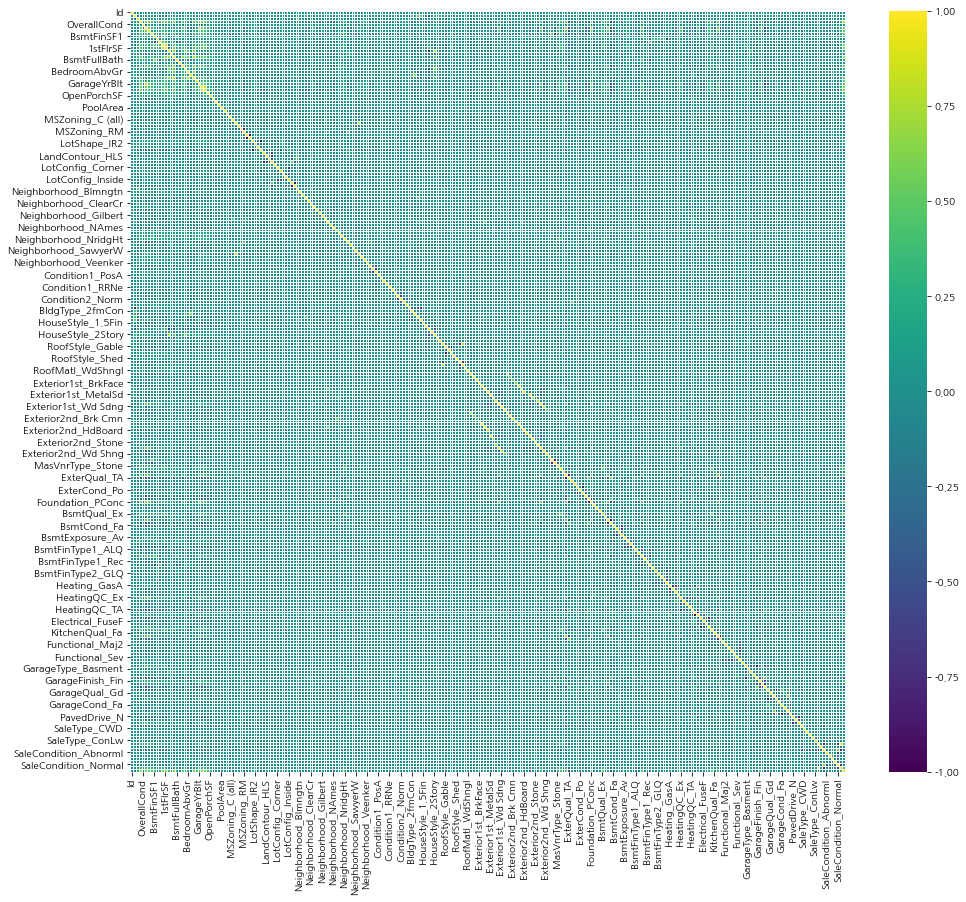

In [58]:
plt.figure(figsize=(16,14))
sns.heatmap(df_heatmap.corr(),  linewidths=0.5,  cmap='viridis')
plt.show()

# 6. 성능 검증을 사용한 평가
### 훈련세트에서 훈련, 평가

### 1) XGBRegressor()
##### : 여러 개의 결정 트리를 임의적으로 학습하는 앙상블의 부스팅 유형
##### : 순차적 학습 방법 => 약한 분류기를 강한 분류기로 만듦

In [59]:
Y_train.shape

(1459,)

In [60]:
from sklearn.model_selection import train_test_split

df_X_train_XGB = df_test_filter_scale_m.copy()
df_Y_train_XGB = Y_train.copy()

X_train, X_val, y_train, y_val = train_test_split(df_X_train_XGB, df_Y_train_XGB, test_size=0.2, shuffle=True)

X_test = df_test_filter_scale_m
test_id_idx = df_test_filter_scale_m.index

In [61]:
print('X_train : ',len(X_train))
print('X_val : ',len(X_val))
print('X_test :',len(X_test))

X_train :  1167
X_val :  292
X_test : 1459


In [62]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [64]:
param = {
    'max_depth':[2,3,4],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'colsample_bylevel': 0.5, 'colsample_bytree': 0.7, 'max_depth': 4, 'n_estimators': 550}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=550, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


### 2) 선형회귀(Linear Regression)
##### : 데이터 집합 $\{ y_{i}, x_{i1}, \dots , x_{ip} \}_{i=1}^{n} $ 에 대해, 종속변수(label) $y_i$와 $p$개의 설명변수(feature) $x_i$ 사이의 선형 관계를 모델링

### 3) 평균 제곱근 오차(RMSE, Root Mean Square Error)
##### : 파라미터를 찾은 뒤 잘 맞는지 성능을 측정하는 지표로는 평균 제곱근 오차
##### : 제곱된 에러를 다시 루트로 풀어주기 때문에 에러를 제곱해서 생기는 값의 왜곡이 좀 덜하다
##### : RMSE 예측오차 값이 작을수록 더 정확한 모형

In [65]:
from sklearn.linear_model import LinearRegression

df_X_train_RMSE = df_test_filter_scale_m.copy()
df_Y_train_RMSE = y_train_scale_m.copy()

lin_reg = LinearRegression()
lin_reg.fit(df_X_train_RMSE, df_Y_train_RMSE)

LinearRegression()

In [66]:
from sklearn.metrics import mean_squared_error

SalePrice_predictions = lin_reg.predict(df_X_train_RMSE)
lin_mse = mean_squared_error(df_Y_train_RMSE, SalePrice_predictions)
lin_rmse = np.sqrt(lin_mse)
print('RMSE :', lin_rmse)

RMSE : 0.10163301601309738


### 4) Ridge
##### : 규제가 추가된 선형 회귀, 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력한다

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")

X = df_test_filter_scale_m.copy()
Y = y_train_scale_m.copy()

ridge_reg.fit(X, Y)
ridge_predict([1.5])

### 5) MSE(Mean Squared Error)
##### : 파라미터를 찾은 뒤 잘 맞는지 성능을 측정하는 지표로는 평균 제곱근 오차
##### $$
MSE = \frac{1}{n} \sum_{i=1}^{n}{\left( \mathbf{W}^{T} \cdot \mathbf{x}_{i} - y_{i}\right)}^{2}
$$


In [67]:
Y_train.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1459, dtype: int64>

In [68]:
from sklearn.metrics import mean_absolute_error
pred_train = grid_search.predict(X_train)
pred_val = grid_search.predict(X_val)

print('train mae score: ', mean_absolute_error(y_train, pred_train))
print('val mae score:', mean_absolute_error(y_val, pred_val))

train mae score:  924.0619209243788
val mae score: 65462.72947880993


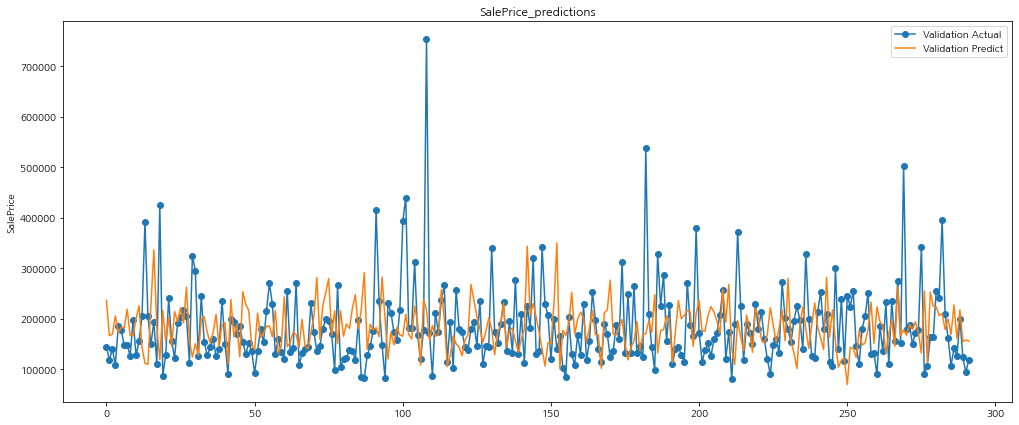

In [69]:
plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_val)), y_val,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '-', label='Validation Predict')
plt.title('SalePrice_predictions')
plt.ylabel('SalePrice')
plt.legend()

In [70]:
test_y_pred = grid_search.predict(X_test)

In [71]:
id_pred_df = pd.DataFrame()
id_pred_df['Id'] = test_id_idx
id_pred_df['SalePrice'] = test_y_pred

In [72]:
id_pred_df

,Id,SalePrice
0,0,209151.937500
1,1,182124.109375
2,2,223285.375000
3,3,140006.671875
4,4,249177.578125
...,...,...
1454,1454,183101.234375
1455,1455,175368.000000
1456,1456,210409.953125
1457,1457,266318.687500


In [73]:
id_pred_df.to_csv('./house-prices-advanced-regression-techniques/5_20_submission.csv', index=False)

In [74]:
# submit = pd.read_csv('./house-prices-advanced-regression-techniques/submission.csv')

In [75]:
# submit.to_csv('./house-prices-advanced-regression-techniques/5_20_submission.csv', index=False) 

In [76]:
id_pred_df.head()

,Id,SalePrice
0,0,209151.937500
1,1,182124.109375
2,2,223285.375000
3,3,140006.671875
4,4,249177.578125
